<a href="https://colab.research.google.com/github/ishita2019/NLP_BERT/blob/main/BERT_TRAINING_LABELS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
%tensorflow_version 1.15.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [3]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime

In [4]:
print(tf.__version__)

1.15.2


In [5]:
!pip install bert-tensorflow==1.0.1

In [6]:
#imporing all the models and methods needed to train BERT model

import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
from bert import modeling

In [48]:
#setting the output directory for saving checkpoints and final model file
OUTPUT_DIR='/gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier'

#Either clear the existing directory or make a new one

do_delete= False

if do_delete:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print( "---Model Output Directory Format: {} ---".format(OUTPUT_DIR))

---Model Output Directory Format: /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier ---


In [7]:
os.getcwd()
from sys import path

In [8]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Independent study/")
path.append("/content/gdrive/My\ Drive/Colab\ Notebooks/Independent\ study/")

In [9]:
text_data=pd.read_csv('ClassifyingImages/classifications/class_photos_ocr_tmp_text_classifications_surroundText.csv')

In [10]:
text_data.head(20)

,caption,class,title,xlabel,ylabel,fname
0,"Fig. 12—Same as Fig. 12, but for the September...",Sun,NaN,NaN,NaN,a6f140f5-0583-48a8-a346-ad1666f54470_s00
1,NaN,Sun,NaN,NaN,NaN,8ed40b02-eeff-4426-9467-85aa7fc95890_s00
2,Fig. 6.—C 1v spectroheliogram and line profile...,Sun,NaN,NaN,NaN,c0e2de31-d8a2-4fa0-ac05-f15750fea2c2_s00
3,NaN,Sun,NaN,NaN,NaN,30ae38f0-dc5a-41ee-b837-8140061a427e_s00
4,Fig. la Fig. 1.—{a) Part of the continuum imag...,Sun,NaN,NaN,NaN,61ec9a54-07b9-43df-8f66-bb7620883f56_s00
5,Fig. 8.—Dynamic spectrum records of 500-1000 M...,Sun,NaN,NaN,NaN,51a922e5-e299-45d2-b26b-794800f103f6_s00
6,Fig. 1—The full-day synthesis cat if the activ...,Sun,NaN,NaN,NaN,7b61294b-d957-4ec4-964d-21ace15e52ac_s00
7,NaN,Sun,NaN,NaN,NaN,732ed371-3d12-484e-b6a5-b4c1225778fe_s00
8,Fig. 2.—Image road map to the event studied he...,Sun,NaN,NaN,NaN,0af6b80f-7234-4bd9-8bd2-8b7c0d25bf4b_s00
9,NaN,Sun,NaN,NaN,NaN,eb566880-6937-45d2-8fae-1c8cad291947_s00


In [11]:
len(text_data)

3336

In [12]:
text_data_woDup= text_data.drop_duplicates()
text_data=text_data_woDup
len(text_data)

3336

In [13]:
text_data['class'].unique()

array(['Sun', 'Multifig', 'RADEC', 'Spectra', 'RADECrel', 'Illustrations',
       'Graph', 'Simulations', 'Planets', 'SkyNoCoords', 'Photos'],
      dtype=object)

In [14]:
#Assigning numbers to these class labels
#'Sun'=0,'Multifig'=1, 'RADEC'=2, 'Spectra'=3, 'RADECrel'=4, 'Illustrations'=5,
#     'Graph'=6, 'Simulations'=7, 'Planets'=8, 'SkyNoCoords'=9, 'Photos'=10 

In [15]:
text_data.loc[text_data['class'] == 'Sun', 'class'] = 0
text_data.loc[text_data['class'] == 'Multifig', 'class'] = 1
text_data.loc[text_data['class'] == 'RADEC', 'class'] = 2
text_data.loc[text_data['class'] == 'Spectra', 'class'] = 3
text_data.loc[text_data['class'] == 'RADECrel', 'class'] = 4
text_data.loc[text_data['class'] == 'Illustrations', 'class'] = 5
text_data.loc[text_data['class'] == 'Graph', 'class'] = 6
text_data.loc[text_data['class'] == 'Simulations', 'class'] = 7
text_data.loc[text_data['class'] == 'Planets', 'class'] = 8
text_data.loc[text_data['class'] == 'SkyNoCoords', 'class'] = 9
text_data.loc[text_data['class'] == 'Photos', 'class'] = 10

In [16]:
text_data.head()

,caption,class,title,xlabel,ylabel,fname
0,"Fig. 12—Same as Fig. 12, but for the September...",0,NaN,NaN,NaN,a6f140f5-0583-48a8-a346-ad1666f54470_s00
1,NaN,0,NaN,NaN,NaN,8ed40b02-eeff-4426-9467-85aa7fc95890_s00
2,Fig. 6.—C 1v spectroheliogram and line profile...,0,NaN,NaN,NaN,c0e2de31-d8a2-4fa0-ac05-f15750fea2c2_s00
3,NaN,0,NaN,NaN,NaN,30ae38f0-dc5a-41ee-b837-8140061a427e_s00
4,Fig. la Fig. 1.—{a) Part of the continuum imag...,0,NaN,NaN,NaN,61ec9a54-07b9-43df-8f66-bb7620883f56_s00


In [17]:
text_data=text_data.drop(['title', 'xlabel','ylabel','fname'], axis=1)

In [18]:
text_data=text_data.dropna()
text_data.head()

,caption,class
0,"Fig. 12—Same as Fig. 12, but for the September...",0
2,Fig. 6.—C 1v spectroheliogram and line profile...,0
4,Fig. la Fig. 1.—{a) Part of the continuum imag...,0
5,Fig. 8.—Dynamic spectrum records of 500-1000 M...,0
6,Fig. 1—The full-day synthesis cat if the activ...,0


In [19]:
len(text_data)

2256

In [20]:

text_data['caption'] = text_data['caption'].str.replace('Fig.','')
#text_data['caption'] = text_data['caption'].str.replace('-',' ')

In [21]:
text_data.head()

,caption,class
0,"12—Same as 12, but for the September 12 flar...",0
2,6.—C 1v spectroheliogram and line profiles of...,0
4,la 1.—{a) Part of the continuum image near 4...,0
5,8.—Dynamic spectrum records of 500-1000 Mc/s ...,0
6,1—The full-day synthesis cat if the active-re...,0


In [22]:
train_data, test_data= train_test_split(text_data, test_size=0.5, random_state=100)
train_data.head()

,caption,class
1262,1. Contour plot of our KPNO r’ band image of ...,4
2919,1. Finder charts for three southern LPVs take...,9
1851,1—Ha CCD image of Kepler’s SNR before subtrac...,9
2673,"4—{a) CCD image of NGC 3628, showing the cent...",9
2823,L = pe centers of these fields are about 6. o...,9


In [23]:
test_data.head()

,caption,class
404,3. Map of HCO* emission integrated over the r...,1
3037,3.—One-minute exposure with 200-inch telescop...,9
2051,"1.—The region around Sharpless 140, reproduce...",9
663,9. Knot groups A-B-C-D of the HH 300 flow and...,2
100,6—Yohkoh SXT images of the 1992 February 17 l...,0


In [24]:
val_data, test_data= train_test_split(test_data, test_size=0.2, random_state=100)
val_data.head()

,caption,class
374,11—Enlargement of a region near the southeast...,1
2321,3.—A representative SXT flare image (Be filte...,9
166,1.—Top: Direct photograph of northwest quadra...,0
3254,2. Twenty minute CCD image of Cepheus A in th...,9
460,"4.—Hydrogen contours for IC 2006, superposed ...",2


In [25]:
test_data.head()

,caption,class
1870,"2—(a) Gray-scale reproduction of the B, band ...",9
3104,a 1.—Photograph in blue light of the northwes...,9
268,"4.—Composite (b, V) diagram of the CO emissio...",1
3188,2.—Spatial distribution of UIT sources in M33...,9
2676,2—Direct plate of NGC 2110 taken by P. Véron ...,9


In [26]:
print("Training Data Shape---",train_data.shape)
print("Validation data shape---", val_data.shape)
print("Test data shape ---", test_data.shape)

Training Data Shape--- (1128, 2)
Validation data shape--- (902, 2)
Test data shape --- (226, 2)


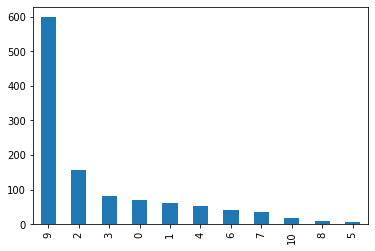

In [27]:
#Distribution of classess in Train Data
train_data['class'].value_counts().plot(kind='bar')

In [28]:
DATA_COLUMN= 'caption'
LABEL_COLUMN='class'


# Data Preprocessing 
**Data Preprocessing for BERT to be trained **
Since the BERT model accept only a specific type of input, the dataset is usually expected to be in the specific format



1.   guid: An unique ID that represents an obervation(row ID)
2.   text_a: The text input that we need to classify into given categories
3.   text_b: Used when trainign a model would require to understand the relationship between sentences and is not application for classification problems
4.   label: Lists the classes/categories/labels an input sentence belongs to



In [29]:
train_input_samples= train_data.apply(lambda x: bert.run_classifier.InputExample(guid=None, text_a=x[DATA_COLUMN], text_b=None, label=x[LABEL_COLUMN]), axis=1)
val_input_samples=val_data.apply(lambda x: bert.run_classifier.InputExample(guid=None, text_a=x[DATA_COLUMN], text_b=None, label=x[LABEL_COLUMN]), axis=1)

In [30]:
train_input_samples

1262    <bert.run_classifier.InputExample object at 0x...
2919    <bert.run_classifier.InputExample object at 0x...
1851    <bert.run_classifier.InputExample object at 0x...
2673    <bert.run_classifier.InputExample object at 0x...
2823    <bert.run_classifier.InputExample object at 0x...
                              ...                        
530     <bert.run_classifier.InputExample object at 0x...
2888    <bert.run_classifier.InputExample object at 0x...
125     <bert.run_classifier.InputExample object at 0x...
2787    <bert.run_classifier.InputExample object at 0x...
2354    <bert.run_classifier.InputExample object at 0x...
Length: 1128, dtype: object

In [31]:
print(train_input_samples.iloc[0].guid)

None


In [32]:
print(train_input_samples.iloc[0].text_a)

 1. Contour plot of our KPNO r’ band image of 3C346. The contours are 2a (N=1,2,3,...,12) where o=0.3 pJy/aresec’. The ‘‘+” marks the position of the optical knot. North is up and east is to the left.


In [33]:
print(train_input_samples.iloc[0].text_b)

None


In [34]:
print(train_input_samples.iloc[0].label)

4


In [35]:
#Loading the BERT pretrained mode
BERT_MODEL_HUB="https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

In [36]:
#creating tokenizer from hub_module

def create_tokenizer_from_tensorflow_hub_module():
  """ Getting the vocab file and casing information from the Hub Module"""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file,do_lower_case= sess.run([tokenization_info["vocab_file"],tokenization_info["do_lower_case"]])
  return bert.tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)



In [37]:
tokenizer= create_tokenizer_from_tensorflow_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [38]:
print(tokenizer.tokenize(train_input_samples.iloc[0].text_a))

['1', '.', 'con', '##tour', 'plot', 'of', 'our', 'k', '##p', '##no', 'r', '’', 'band', 'image', 'of', '3', '##c', '##34', '##6', '.', 'the', 'con', '##tour', '##s', 'are', '2a', '(', 'n', '=', '1', ',', '2', ',', '3', ',', '.', '.', '.', ',', '12', ')', 'where', 'o', '=', '0', '.', '3', 'p', '##j', '##y', '/', 'ares', '##ec', '’', '.', 'the', '‘', '‘', '+', '”', 'marks', 'the', 'position', 'of', 'the', 'optical', 'knot', '.', 'north', 'is', 'up', 'and', 'east', 'is', 'to', 'the', 'left', '.']


In [39]:
MAX_SEQ_LEN= 128
label_list=[0,1,2,3,4,5,6,7,8,9,10]
train_features= bert.run_classifier.convert_examples_to_features(train_input_samples, label_list, MAX_SEQ_LEN, tokenizer)
validation_features= bert.run_classifier.convert_examples_to_features(val_input_samples, label_list, MAX_SEQ_LEN, tokenizer)

INFO:tensorflow:Writing example 0 of 1128


INFO:tensorflow:Writing example 0 of 1128


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 1 . con ##tour plot of our k ##p ##no r ’ band image of 3 ##c ##34 ##6 . the con ##tour ##s are 2a ( n = 1 , 2 , 3 , . . . , 12 ) where o = 0 . 3 p ##j ##y / ares ##ec ’ . the ‘ ‘ + ” marks the position of the optical knot . north is up and east is to the left . [SEP]


INFO:tensorflow:tokens: [CLS] 1 . con ##tour plot of our k ##p ##no r ’ band image of 3 ##c ##34 ##6 . the con ##tour ##s are 2a ( n = 1 , 2 , 3 , . . . , 12 ) where o = 0 . 3 p ##j ##y / ares ##ec ’ . the ‘ ‘ + ” marks the position of the optical knot . north is up and east is to the left . [SEP]


INFO:tensorflow:input_ids: 101 1015 1012 9530 21163 5436 1997 2256 1047 2361 3630 1054 1521 2316 3746 1997 1017 2278 22022 2575 1012 1996 9530 21163 2015 2024 23409 1006 1050 1027 1015 1010 1016 1010 1017 1010 1012 1012 1012 1010 2260 1007 2073 1051 1027 1014 1012 1017 1052 3501 2100 1013 23631 8586 1521 1012 1996 1520 1520 1009 1524 6017 1996 2597 1997 1996 9380 12226 1012 2167 2003 2039 1998 2264 2003 2000 1996 2187 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1015 1012 9530 21163 5436 1997 2256 1047 2361 3630 1054 1521 2316 3746 1997 1017 2278 22022 2575 1012 1996 9530 21163 2015 2024 23409 1006 1050 1027 1015 1010 1016 1010 1017 1010 1012 1012 1012 1010 2260 1007 2073 1051 1027 1014 1012 1017 1052 3501 2100 1013 23631 8586 1521 1012 1996 1520 1520 1009 1524 6017 1996 2597 1997 1996 9380 12226 1012 2167 2003 2039 1998 2264 2003 2000 1996 2187 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 4 (id = 4)


INFO:tensorflow:label: 4 (id = 4)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 1 . find ##er charts for three southern lp ##vs taken from the es ##o / sr ##c plates . ( a ) . j survey field for e ##i tr ##a . star “ ‘ e ” was initially mistakenly identified as the variable , and consequently included in our photo ##ele ##ctric measurements . [SEP]


INFO:tensorflow:tokens: [CLS] 1 . find ##er charts for three southern lp ##vs taken from the es ##o / sr ##c plates . ( a ) . j survey field for e ##i tr ##a . star “ ‘ e ” was initially mistakenly identified as the variable , and consequently included in our photo ##ele ##ctric measurements . [SEP]


INFO:tensorflow:input_ids: 101 1015 1012 2424 2121 6093 2005 2093 2670 6948 15088 2579 2013 1996 9686 2080 1013 5034 2278 7766 1012 1006 1037 1007 1012 1046 5002 2492 2005 1041 2072 19817 2050 1012 2732 1523 1520 1041 1524 2001 3322 20706 4453 2004 1996 8023 1010 1998 8821 2443 1999 2256 6302 12260 22601 11702 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1015 1012 2424 2121 6093 2005 2093 2670 6948 15088 2579 2013 1996 9686 2080 1013 5034 2278 7766 1012 1006 1037 1007 1012 1046 5002 2492 2005 1041 2072 19817 2050 1012 2732 1523 1520 1041 1524 2001 3322 20706 4453 2004 1996 8023 1010 1998 8821 2443 1999 2256 6302 12260 22601 11702 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 1 — ha cc ##d image of kepler ’ s s ##nr before sub ##tra ##ction of stellar contamination . the field shown is 4 / 1 vertically and 4 / 4 horizontally . slit positions for our long - slit spectra are indicated along with some fi ##du ##cial stars . north is up and east is to the left . [SEP]


INFO:tensorflow:tokens: [CLS] 1 — ha cc ##d image of kepler ’ s s ##nr before sub ##tra ##ction of stellar contamination . the field shown is 4 / 1 vertically and 4 / 4 horizontally . slit positions for our long - slit spectra are indicated along with some fi ##du ##cial stars . north is up and east is to the left . [SEP]


INFO:tensorflow:input_ids: 101 1015 1517 5292 10507 2094 3746 1997 28219 1521 1055 1055 16118 2077 4942 6494 7542 1997 17227 18701 1012 1996 2492 3491 2003 1018 1013 1015 20018 1998 1018 1013 1018 23190 1012 18036 4460 2005 2256 2146 1011 18036 29237 2024 5393 2247 2007 2070 10882 8566 13247 3340 1012 2167 2003 2039 1998 2264 2003 2000 1996 2187 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1015 1517 5292 10507 2094 3746 1997 28219 1521 1055 1055 16118 2077 4942 6494 7542 1997 17227 18701 1012 1996 2492 3491 2003 1018 1013 1015 20018 1998 1018 1013 1018 23190 1012 18036 4460 2005 2256 2146 1011 18036 29237 2024 5393 2247 2007 2070 10882 8566 13247 3340 1012 2167 2003 2039 1998 2264 2003 2000 1996 2187 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 4 — { a ) cc ##d image of ngc 36 ##28 , showing the central h 1 regions and the southern ha plume . ( b ) cc ##d frame showing the northern fi ##lam ##ents . both frames are 79 ##6 x 79 ##6 pixels , with a pixel ~ 07 ##3 . [SEP]


INFO:tensorflow:tokens: [CLS] 4 — { a ) cc ##d image of ngc 36 ##28 , showing the central h 1 regions and the southern ha plume . ( b ) cc ##d frame showing the northern fi ##lam ##ents . both frames are 79 ##6 x 79 ##6 pixels , with a pixel ~ 07 ##3 . [SEP]


INFO:tensorflow:input_ids: 101 1018 1517 1063 1037 1007 10507 2094 3746 1997 27645 4029 22407 1010 4760 1996 2430 1044 1015 4655 1998 1996 2670 5292 26888 1012 1006 1038 1007 10507 2094 4853 4760 1996 2642 10882 10278 11187 1012 2119 11048 2024 6535 2575 1060 6535 2575 27725 1010 2007 1037 22138 1066 5718 2509 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1018 1517 1063 1037 1007 10507 2094 3746 1997 27645 4029 22407 1010 4760 1996 2430 1044 1015 4655 1998 1996 2670 5292 26888 1012 1006 1038 1007 10507 2094 4853 4760 1996 2642 10882 10278 11187 1012 2119 11048 2024 6535 2575 1060 6535 2575 27725 1010 2007 1037 22138 1066 5718 2509 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] l = pe centers of these fields are about 6 . os photographs of the ga ##c field . the faint ##er stars in table 4 are identified . the 1975 no ##c ##n ##fin ##ai ##tes of the ( a ) 620 ##0 ##5 , + 28 ##° ##0 ##9 ’ ; ( 6 ) 5 " 58 ##7 ##4 , + 28 ##° ##0 ##9 ’ ; ( c ) 640 ##0 ##™ ##5 , + 27 ##° ##30 ’ ; ( d ) 58 ##58 " 4 , + 27 ##° ##30 ’ . ( k ##p ##no 90 cm telescope photographs , 15 minutes , ii ##a - d . ) [SEP]


INFO:tensorflow:tokens: [CLS] l = pe centers of these fields are about 6 . os photographs of the ga ##c field . the faint ##er stars in table 4 are identified . the 1975 no ##c ##n ##fin ##ai ##tes of the ( a ) 620 ##0 ##5 , + 28 ##° ##0 ##9 ’ ; ( 6 ) 5 " 58 ##7 ##4 , + 28 ##° ##0 ##9 ’ ; ( c ) 640 ##0 ##™ ##5 , + 27 ##° ##30 ’ ; ( d ) 58 ##58 " 4 , + 27 ##° ##30 ’ . ( k ##p ##no 90 cm telescope photographs , 15 minutes , ii ##a - d . ) [SEP]


INFO:tensorflow:input_ids: 101 1048 1027 21877 6401 1997 2122 4249 2024 2055 1020 1012 9808 7008 1997 1996 11721 2278 2492 1012 1996 8143 2121 3340 1999 2795 1018 2024 4453 1012 1996 3339 2053 2278 2078 16294 4886 4570 1997 1996 1006 1037 1007 23612 2692 2629 1010 1009 2654 7737 2692 2683 1521 1025 1006 1020 1007 1019 1000 5388 2581 2549 1010 1009 2654 7737 2692 2683 1521 1025 1006 1039 1007 19714 2692 30108 2629 1010 1009 2676 7737 14142 1521 1025 1006 1040 1007 5388 27814 1000 1018 1010 1009 2676 7737 14142 1521 1012 1006 1047 2361 3630 3938 4642 12772 7008 1010 2321 2781 1010 2462 2050 1011 1040 1012 1007 102 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1048 1027 21877 6401 1997 2122 4249 2024 2055 1020 1012 9808 7008 1997 1996 11721 2278 2492 1012 1996 8143 2121 3340 1999 2795 1018 2024 4453 1012 1996 3339 2053 2278 2078 16294 4886 4570 1997 1996 1006 1037 1007 23612 2692 2629 1010 1009 2654 7737 2692 2683 1521 1025 1006 1020 1007 1019 1000 5388 2581 2549 1010 1009 2654 7737 2692 2683 1521 1025 1006 1039 1007 19714 2692 30108 2629 1010 1009 2676 7737 14142 1521 1025 1006 1040 1007 5388 27814 1000 1018 1010 1009 2676 7737 14142 1521 1012 1006 1047 2361 3630 3938 4642 12772 7008 1010 2321 2781 1010 2462 2050 1011 1040 1012 1007 102 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:Writing example 0 of 902


INFO:tensorflow:Writing example 0 of 902


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 11 — en ##lar ##gement of a region near the southeastern edge of w ##f ##2 , with [ s 11 ] on the left and f ##70 ##2 ##w on the right . the star that is marked is the wal ##born & blades ( 1987 ) star number 2 , classified as an early o main - sequence star . the images have been deco ##n ##vo ##lved using the lucy algorithm and rotated to match the orientation of 2 . cosmic rays have not been removed from the f ##70 ##2 ##w image . the regular circular and spoke pattern seen in the [ s 11 ] image matches the ps ##f pattern seen around bright stars in that chip . [SEP]


INFO:tensorflow:tokens: [CLS] 11 — en ##lar ##gement of a region near the southeastern edge of w ##f ##2 , with [ s 11 ] on the left and f ##70 ##2 ##w on the right . the star that is marked is the wal ##born & blades ( 1987 ) star number 2 , classified as an early o main - sequence star . the images have been deco ##n ##vo ##lved using the lucy algorithm and rotated to match the orientation of 2 . cosmic rays have not been removed from the f ##70 ##2 ##w image . the regular circular and spoke pattern seen in the [ s 11 ] image matches the ps ##f pattern seen around bright stars in that chip . [SEP]


INFO:tensorflow:input_ids: 101 2340 1517 4372 8017 20511 1997 1037 2555 2379 1996 8252 3341 1997 1059 2546 2475 1010 2007 1031 1055 2340 1033 2006 1996 2187 1998 1042 19841 2475 2860 2006 1996 2157 1012 1996 2732 2008 2003 4417 2003 1996 24547 10280 1004 10491 1006 3055 1007 2732 2193 1016 1010 6219 2004 2019 2220 1051 2364 1011 5537 2732 1012 1996 4871 2031 2042 21933 2078 6767 26832 2478 1996 7004 9896 1998 20931 2000 2674 1996 10296 1997 1016 1012 14448 9938 2031 2025 2042 3718 2013 1996 1042 19841 2475 2860 3746 1012 1996 3180 8206 1998 3764 5418 2464 1999 1996 1031 1055 2340 1033 3746 3503 1996 8827 2546 5418 2464 2105 4408 3340 1999 2008 9090 1012 102 0 0


INFO:tensorflow:input_ids: 101 2340 1517 4372 8017 20511 1997 1037 2555 2379 1996 8252 3341 1997 1059 2546 2475 1010 2007 1031 1055 2340 1033 2006 1996 2187 1998 1042 19841 2475 2860 2006 1996 2157 1012 1996 2732 2008 2003 4417 2003 1996 24547 10280 1004 10491 1006 3055 1007 2732 2193 1016 1010 6219 2004 2019 2220 1051 2364 1011 5537 2732 1012 1996 4871 2031 2042 21933 2078 6767 26832 2478 1996 7004 9896 1998 20931 2000 2674 1996 10296 1997 1016 1012 14448 9938 2031 2025 2042 3718 2013 1996 1042 19841 2475 2860 3746 1012 1996 3180 8206 1998 3764 5418 2464 1999 1996 1031 1055 2340 1033 3746 3503 1996 8827 2546 5418 2464 2105 4408 3340 1999 2008 9090 1012 102 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 3 . — a representative s ##xt flare image ( be filter , 13 : 22 : 35 ut ) super ##posed on a me ##es observatory magnet ##og ##ram . the solid con ##tour ##s represent positive vertical field ; the dashed con ##tour ##s represent negative vertical field . the con ##tour levels are 50 , 100 , 200 , 400 , 800 , 1600 , and 320 ##0 g . the thick solid lines are potential field extra ##pol ##ations . north is toward the top ; west is toward the right . [SEP]


INFO:tensorflow:tokens: [CLS] 3 . — a representative s ##xt flare image ( be filter , 13 : 22 : 35 ut ) super ##posed on a me ##es observatory magnet ##og ##ram . the solid con ##tour ##s represent positive vertical field ; the dashed con ##tour ##s represent negative vertical field . the con ##tour levels are 50 , 100 , 200 , 400 , 800 , 1600 , and 320 ##0 g . the thick solid lines are potential field extra ##pol ##ations . north is toward the top ; west is toward the right . [SEP]


INFO:tensorflow:input_ids: 101 1017 1012 1517 1037 4387 1055 18413 17748 3746 1006 2022 11307 1010 2410 1024 2570 1024 3486 21183 1007 3565 19155 2006 1037 2033 2229 9970 16853 8649 6444 1012 1996 5024 9530 21163 2015 5050 3893 7471 2492 1025 1996 18198 9530 21163 2015 5050 4997 7471 2492 1012 1996 9530 21163 3798 2024 2753 1010 2531 1010 3263 1010 4278 1010 5385 1010 14883 1010 1998 13710 2692 1043 1012 1996 4317 5024 3210 2024 4022 2492 4469 18155 10708 1012 2167 2003 2646 1996 2327 1025 2225 2003 2646 1996 2157 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1017 1012 1517 1037 4387 1055 18413 17748 3746 1006 2022 11307 1010 2410 1024 2570 1024 3486 21183 1007 3565 19155 2006 1037 2033 2229 9970 16853 8649 6444 1012 1996 5024 9530 21163 2015 5050 3893 7471 2492 1025 1996 18198 9530 21163 2015 5050 4997 7471 2492 1012 1996 9530 21163 3798 2024 2753 1010 2531 1010 3263 1010 4278 1010 5385 1010 14883 1010 1998 13710 2692 1043 1012 1996 4317 5024 3210 2024 4022 2492 4469 18155 10708 1012 2167 2003 2646 1996 2327 1025 2225 2003 2646 1996 2157 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 1 . — top : direct photograph of northwest quadrant of sun . bottom : ha spec ##tro ##hel ##io ##gram showing flare in relation to suns ##pot group , taken at 21 : 41 u . t . , july 16 , 1959 . north is to the right , west at the top . photographs by t . cr ##ag ##g . [SEP]


INFO:tensorflow:tokens: [CLS] 1 . — top : direct photograph of northwest quadrant of sun . bottom : ha spec ##tro ##hel ##io ##gram showing flare in relation to suns ##pot group , taken at 21 : 41 u . t . , july 16 , 1959 . north is to the right , west at the top . photographs by t . cr ##ag ##g . [SEP]


INFO:tensorflow:input_ids: 101 1015 1012 1517 2327 1024 3622 9982 1997 4514 29371 1997 3103 1012 3953 1024 5292 28699 13181 16001 3695 13113 4760 17748 1999 7189 2000 19352 11008 2177 1010 2579 2012 2538 1024 4601 1057 1012 1056 1012 1010 2251 2385 1010 3851 1012 2167 2003 2000 1996 2157 1010 2225 2012 1996 2327 1012 7008 2011 1056 1012 13675 8490 2290 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1015 1012 1517 2327 1024 3622 9982 1997 4514 29371 1997 3103 1012 3953 1024 5292 28699 13181 16001 3695 13113 4760 17748 1999 7189 2000 19352 11008 2177 1010 2579 2012 2538 1024 4601 1057 1012 1056 1012 1010 2251 2385 1010 3851 1012 2167 2003 2000 1996 2157 1010 2225 2012 1996 2327 1012 7008 2011 1056 1012 13675 8490 2290 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 2 . twenty minute cc ##d image of ce ##pheus a in the light of ha + [ n 11 ] . slit positions used for medium - resolution spectroscopy are indicated . and the h ##h objects labeled . objects h and e are distinctly com ##ma shaped . [SEP]


INFO:tensorflow:tokens: [CLS] 2 . twenty minute cc ##d image of ce ##pheus a in the light of ha + [ n 11 ] . slit positions used for medium - resolution spectroscopy are indicated . and the h ##h objects labeled . objects h and e are distinctly com ##ma shaped . [SEP]


INFO:tensorflow:input_ids: 101 1016 1012 3174 3371 10507 2094 3746 1997 8292 22809 1037 1999 1996 2422 1997 5292 1009 1031 1050 2340 1033 1012 18036 4460 2109 2005 5396 1011 5813 25458 2024 5393 1012 1998 1996 1044 2232 5200 12599 1012 5200 1044 1998 1041 2024 19517 4012 2863 5044 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1016 1012 3174 3371 10507 2094 3746 1997 8292 22809 1037 1999 1996 2422 1997 5292 1009 1031 1050 2340 1033 1012 18036 4460 2109 2005 5396 1011 5813 25458 2024 5393 1012 1998 1996 1044 2232 5200 12599 1012 5200 1044 1998 1041 2024 19517 4012 2863 5044 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:label: 9 (id = 9)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] 4 . — hydrogen con ##tour ##s for ic 2006 , super ##posed on a reproduction of two sum ##med iii ##a - j plates taken at the prime focus of the cerro to ##lo ##lo 4 ##m telescope . con ##tour ##s are in steps of 3 x 10 ' ° atoms cm ~ [SEP]


INFO:tensorflow:tokens: [CLS] 4 . — hydrogen con ##tour ##s for ic 2006 , super ##posed on a reproduction of two sum ##med iii ##a - j plates taken at the prime focus of the cerro to ##lo ##lo 4 ##m telescope . con ##tour ##s are in steps of 3 x 10 ' ° atoms cm ~ [SEP]


INFO:tensorflow:input_ids: 101 1018 1012 1517 9732 9530 21163 2015 2005 24582 2294 1010 3565 19155 2006 1037 14627 1997 2048 7680 7583 3523 2050 1011 1046 7766 2579 2012 1996 3539 3579 1997 1996 25498 2000 4135 4135 1018 2213 12772 1012 9530 21163 2015 2024 1999 4084 1997 1017 1060 2184 1005 1080 13353 4642 1066 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1018 1012 1517 9732 9530 21163 2015 2005 24582 2294 1010 3565 19155 2006 1037 14627 1997 2048 7680 7583 3523 2050 1011 1046 7766 2579 2012 1996 3539 3579 1997 1996 25498 2000 4135 4135 1018 2213 12772 1012 9530 21163 2015 2024 1999 4084 1997 1017 1060 2184 1005 1080 13353 4642 1066 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


In [40]:
print(train_input_samples.iloc[0].text_a)

 1. Contour plot of our KPNO r’ band image of 3C346. The contours are 2a (N=1,2,3,...,12) where o=0.3 pJy/aresec’. The ‘‘+” marks the position of the optical knot. North is up and east is to the left.


In [41]:
print(tokenizer.tokenize(train_input_samples.iloc[0].text_a))

['1', '.', 'con', '##tour', 'plot', 'of', 'our', 'k', '##p', '##no', 'r', '’', 'band', 'image', 'of', '3', '##c', '##34', '##6', '.', 'the', 'con', '##tour', '##s', 'are', '2a', '(', 'n', '=', '1', ',', '2', ',', '3', ',', '.', '.', '.', ',', '12', ')', 'where', 'o', '=', '0', '.', '3', 'p', '##j', '##y', '/', 'ares', '##ec', '’', '.', 'the', '‘', '‘', '+', '”', 'marks', 'the', 'position', 'of', 'the', 'optical', 'knot', '.', 'north', 'is', 'up', 'and', 'east', 'is', 'to', 'the', 'left', '.']


In [42]:
print(train_features[0].input_ids)

[101, 1015, 1012, 9530, 21163, 5436, 1997, 2256, 1047, 2361, 3630, 1054, 1521, 2316, 3746, 1997, 1017, 2278, 22022, 2575, 1012, 1996, 9530, 21163, 2015, 2024, 23409, 1006, 1050, 1027, 1015, 1010, 1016, 1010, 1017, 1010, 1012, 1012, 1012, 1010, 2260, 1007, 2073, 1051, 1027, 1014, 1012, 1017, 1052, 3501, 2100, 1013, 23631, 8586, 1521, 1012, 1996, 1520, 1520, 1009, 1524, 6017, 1996, 2597, 1997, 1996, 9380, 12226, 1012, 2167, 2003, 2039, 1998, 2264, 2003, 2000, 1996, 2187, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [43]:
print(train_features[0].input_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [44]:
print(train_features[0].segment_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Building a Multi-Class Classifier Model 


In [45]:
def create_multi_class_model(is_predicting, input_ids, input_mask, segment_ids, labels, num_labels):
  bert_module= hub.Module(BERT_MODEL_HUB, trainable=True)
  bert_inputs= dict(input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids)
  bert_outputs= bert_module(inputs=bert_inputs, signature= "tokens", as_dict=True)

  # "pooled_output is used for classification tasks on an entire sentence"
  # sequence_output" is used for token-level output

  output_layer= bert_outputs["pooled_output"]
  hidden_size= output_layer.shape[-1].value

  # creating own layer for tuning the data for politeness
  output_weights= tf.get_variable("output_weights", [num_labels, hidden_size], initializer=tf.truncated_normal_initializer(stddev=0.02))
  output_bias= tf.get_variable("output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Droput to prevent overfitting

    output_layer= tf.nn.dropout(output_layer, keep_prob=0.9)
    logits= tf.matmul(output_layer, output_weights, transpose_b=True)
    logits= tf.nn.bias_add(logits, output_bias)
    log_probs=tf.nn.log_softmax(logits, axis=1)

    #Converting labels for one_hot_encoding

    one_hot_labels= tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels= tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))

    # When predicting task, we want the the predicted labels and the probabilities

    if is_predicting:
      return (predicted_labels, log_probs)

    # During training/evaluation, compute loss between predicted and actual class label

    per_sample_loss= -tf.reduce_sum(one_hot_labels*log_probs, axis=-1)
    loss= tf.reduce_mean(per_sample_loss)

    return (loss, predicted_labels, log_probs)

In [46]:
# A function to fit the above model for training, evaluation and prediction
# Basically it builds the model using the previous model definition

def model_func_builder( num_labels, learning_rate, num_train_steps, num_warmup_steps):

  def model_func(features, labels, mode, params):

    input_ids= features["input_ids"]
    input_mask=features["input_mask"]
    segment_ids=features["segment_ids"]
    label_ids=features["label_ids"]

    is_predicting= (mode== tf.estimator.ModeKeys.PREDICT)

    #Train and Eval

    if not is_predicting:
      (loss, predicted_labels, log_probs)= create_multi_class_model( is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op= bert.optimization.create_optimizer(loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Now, calculating the evaluation Metrics

      def metric_eval_func(label_ids, predicted_labels):
        accuracy= tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos= tf.metrics.true_positives(label_ids, predicted_labels)
        true_neg=tf.metrics.true_negatives(label_ids, predicted_labels)
        false_pos=tf.metrics.false_positives(label_ids, predicted_labels)
        false_neg= tf.metrics.false_negatives(label_ids, predicted_labels)

        return {"eval_accuracy": accuracy,
                "true_positives": true_pos,
                "true_negatives": true_neg,
                "false_pos": false_pos,
                "false_neg": false_neg}
        
      eval_metrics= metric_eval_func(label_ids, predicted_labels)

      if mode== tf.estimator.ModeKeys.TRAIN:

        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
      else:
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metrics)

    else:

      (predicted_labels, log_probs)= create_multi_class_model(is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)
      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

# Now returning the actual model function in the closure
  return model_func 


In [110]:
# Comptuting the train and warm up steps from the batch size
BATCH_SIZE= 32
LEARNING_RATE=2e-6
NUM_TRAIN_EPOCHS= 20.0

#Warmping up since it helps in training for small learning rate initially and gradually increasing it

WARMUP_PROPORTION = 0.1

# Model Configuration

SAVE_CHECKPOINTS_STEPS =300
SAVE_SUMMARY_STEPS=100

#Computing Training and Warmup steps from batch size

num_train_steps= int(len(train_features)/ BATCH_SIZE*NUM_TRAIN_EPOCHS)
num_warmup_steps= int(num_train_steps*WARMUP_PROPORTION)

# Specifying output DIR and also number of checkpoints steps to save

run_config= tf.estimator.RunConfig(model_dir=OUTPUT_DIR, save_summary_steps=SAVE_SUMMARY_STEPS, save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)


In [111]:
# Initializing the model and the estimator

model_func= model_func_builder( num_labels= len(label_list), learning_rate= LEARNING_RATE, num_train_steps=num_train_steps, num_warmup_steps=num_warmup_steps)
estimator= tf.estimator.Estimator( model_fn=model_func, config= run_config, params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fca7fc935f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fca7fc935f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Now its needed to create a input builder function take taken in the input_features and produces a generator. Just following design patterns for using Tensorflow

In [112]:
# Creting an input function for training. drop_remainder= Ture for using TPUs

train_input_function= bert.run_classifier.input_fn_builder(features= train_features, seq_length=MAX_SEQ_LEN, is_training=True, drop_remainder=False)

# Creting an input function for validating. drop_remainder= Ture for using TPUs

val_input_function=bert.run_classifier.input_fn_builder(features= validation_features, seq_length=MAX_SEQ_LEN, is_training=False, drop_remainder=False)



#Finally Training and Evaluting

In [113]:
#Trainign the Model

print("Beginignt the training! Be Patient")
current_time= datetime.now()
estimator.train(input_fn=train_input_function, max_steps=num_train_steps)
print("Training the BERT model took time", datetime.now()-current_time)

Beginignt the training! Be Patient
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-528


INFO:tensorflow:Restoring parameters from /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-528


Instructions for updating:
Use standard file utilities to get mtimes.


Instructions for updating:
Use standard file utilities to get mtimes.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 528 into /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt.


INFO:tensorflow:Saving checkpoints for 528 into /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt.


INFO:tensorflow:loss = 0.037323903, step = 528


INFO:tensorflow:loss = 0.037323903, step = 528


INFO:tensorflow:global_step/sec: 0.984255


INFO:tensorflow:global_step/sec: 0.984255


INFO:tensorflow:loss = 0.027506031, step = 628 (101.601 sec)


INFO:tensorflow:loss = 0.027506031, step = 628 (101.601 sec)


INFO:tensorflow:Saving checkpoints for 705 into /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt.


INFO:tensorflow:Saving checkpoints for 705 into /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt.


INFO:tensorflow:Loss for final step: 0.029514076.


INFO:tensorflow:Loss for final step: 0.029514076.


Training the BERT model took time 0:03:28.383634


In [114]:
#Evaluating the model with our validation set

estimator.evaluate(input_fn=val_input_function, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-10-27T05:19:40Z


INFO:tensorflow:Starting evaluation at 2020-10-27T05:19:40Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-705


INFO:tensorflow:Restoring parameters from /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-705


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-10-27-05:19:54


INFO:tensorflow:Finished evaluation at 2020-10-27-05:19:54


INFO:tensorflow:Saving dict for global step 705: eval_accuracy = 0.7006652, false_neg = 23.0, false_pos = 16.0, global_step = 705, loss = 1.419422, true_negatives = 41.0, true_positives = 822.0


INFO:tensorflow:Saving dict for global step 705: eval_accuracy = 0.7006652, false_neg = 23.0, false_pos = 16.0, global_step = 705, loss = 1.419422, true_negatives = 41.0, true_positives = 822.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 705: /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-705


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 705: /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-705


{'eval_accuracy': 0.7006652,
 'false_neg': 23.0,
 'false_pos': 16.0,
 'global_step': 705,
 'loss': 1.419422,
 'true_negatives': 41.0,
 'true_positives': 822.0}

# Prediction for Test Data

In [115]:
"""Sun'=0,'Multifig'=1, 'RADEC'=2, 'Spectra'=3, 'RADECrel'=4, 'Illustrations'=5,
'Graph'=6, 'Simulations'=7, 'Planets'=8, 'SkyNoCoords'=9, 'Photos'=10 """

def get_predicted_result(test_sentences):
  #A list tp map the actual labels to the predicted
  labels=["Sun","Multifig", "RADEC", "Spectra", "RADECrel","Illustrations",
  "Graph", "Simulations", "Planets", "SkyNoCoords", "Photos"]

  #Transforming the Test data for BERT input format

  input_samples= [run_classifier.InputExample(guid="", text_a=x, text_b=None, label=0) for x in test_sentences]


  # Next creating input features for test_data
  input_features=run_classifier.convert_examples_to_features(input_samples, label_list, MAX_SEQ_LEN, tokenizer)

  #Predicting the classes
  predict_input_func= run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LEN, is_training=False, drop_remainder=False)

  predictions= estimator.predict(predict_input_func)

  return [ ( sentence, prediction["probabilities"], prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(test_sentences, predictions)]


In [116]:
test_sentences= list(test_data['caption'])

In [117]:
predictions= get_predicted_result(test_sentences)

INFO:tensorflow:Writing example 0 of 226


INFO:tensorflow:Writing example 0 of 226


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] 2 — ( a ) gray - scale reproduction of the b , band image of the field ir ##l with a position matched sub ##section of the [ ras 100 um con ##tour map over ##laid . dark areas on the black and white image correspond to regions of high optical surface brightness . spa ##cing between the 100 um con ##tour ##s is 0 . 6 m ##j ##y sr ~ ‘ , and brightness levels decrease mono ##tonic ##ally from the ne corner of the field to the sw . arrows mark the directions n and e , and the line segment represents 1 ’ . ( b ) same as ( a ) , showing the r band image of ir ##l [SEP]


INFO:tensorflow:tokens: [CLS] 2 — ( a ) gray - scale reproduction of the b , band image of the field ir ##l with a position matched sub ##section of the [ ras 100 um con ##tour map over ##laid . dark areas on the black and white image correspond to regions of high optical surface brightness . spa ##cing between the 100 um con ##tour ##s is 0 . 6 m ##j ##y sr ~ ‘ , and brightness levels decrease mono ##tonic ##ally from the ne corner of the field to the sw . arrows mark the directions n and e , and the line segment represents 1 ’ . ( b ) same as ( a ) , showing the r band image of ir ##l [SEP]


INFO:tensorflow:input_ids: 101 1016 1517 1006 1037 1007 3897 1011 4094 14627 1997 1996 1038 1010 2316 3746 1997 1996 2492 20868 2140 2007 1037 2597 10349 4942 29015 1997 1996 1031 20710 2531 8529 9530 21163 4949 2058 24393 1012 2601 2752 2006 1996 2304 1998 2317 3746 17254 2000 4655 1997 2152 9380 3302 18295 1012 12403 6129 2090 1996 2531 8529 9530 21163 2015 2003 1014 1012 1020 1049 3501 2100 5034 1066 1520 1010 1998 18295 3798 9885 18847 25009 3973 2013 1996 11265 3420 1997 1996 2492 2000 1996 25430 1012 12563 2928 1996 7826 1050 1998 1041 1010 1998 1996 2240 6903 5836 1015 1521 1012 1006 1038 1007 2168 2004 1006 1037 1007 1010 4760 1996 1054 2316 3746 1997 20868 2140 102


INFO:tensorflow:input_ids: 101 1016 1517 1006 1037 1007 3897 1011 4094 14627 1997 1996 1038 1010 2316 3746 1997 1996 2492 20868 2140 2007 1037 2597 10349 4942 29015 1997 1996 1031 20710 2531 8529 9530 21163 4949 2058 24393 1012 2601 2752 2006 1996 2304 1998 2317 3746 17254 2000 4655 1997 2152 9380 3302 18295 1012 12403 6129 2090 1996 2531 8529 9530 21163 2015 2003 1014 1012 1020 1049 3501 2100 5034 1066 1520 1010 1998 18295 3798 9885 18847 25009 3973 2013 1996 11265 3420 1997 1996 2492 2000 1996 25430 1012 12563 2928 1996 7826 1050 1998 1041 1010 1998 1996 2240 6903 5836 1015 1521 1012 1006 1038 1007 2168 2004 1006 1037 1007 1010 4760 1996 1054 2316 3746 1997 20868 2140 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] a 1 . — photograph in blue light of the northwest quadrant of the gr ##ae region under investigation is ‘ ‘ boxed . ” [SEP]


INFO:tensorflow:tokens: [CLS] a 1 . — photograph in blue light of the northwest quadrant of the gr ##ae region under investigation is ‘ ‘ boxed . ” [SEP]


INFO:tensorflow:input_ids: 101 1037 1015 1012 1517 9982 1999 2630 2422 1997 1996 4514 29371 1997 1996 24665 6679 2555 2104 4812 2003 1520 1520 27554 1012 1524 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1037 1015 1012 1517 9982 1999 2630 2422 1997 1996 4514 29371 1997 1996 24665 6679 2555 2104 4812 2003 1520 1520 27554 1012 1524 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] 4 . — composite ( b , v ) diagram of the co emission . the upper half ( vis ##r > 0 ) is along the eastern ridge at / = 10 ’ , and the lower half ( vis ##r < 0 ) along the western ridge at / = — 30 ’ . con ##tour ##s are at 1 , 2 , . . . , 10 , 12 , 15 , 20 g ##j ann ##y 40 x 0 . 1 k . [SEP]


INFO:tensorflow:tokens: [CLS] 4 . — composite ( b , v ) diagram of the co emission . the upper half ( vis ##r > 0 ) is along the eastern ridge at / = 10 ’ , and the lower half ( vis ##r < 0 ) along the western ridge at / = — 30 ’ . con ##tour ##s are at 1 , 2 , . . . , 10 , 12 , 15 , 20 g ##j ann ##y 40 x 0 . 1 k . [SEP]


INFO:tensorflow:input_ids: 101 1018 1012 1517 12490 1006 1038 1010 1058 1007 16403 1997 1996 2522 15760 1012 1996 3356 2431 1006 25292 2099 1028 1014 1007 2003 2247 1996 2789 5526 2012 1013 1027 2184 1521 1010 1998 1996 2896 2431 1006 25292 2099 1026 1014 1007 2247 1996 2530 5526 2012 1013 1027 1517 2382 1521 1012 9530 21163 2015 2024 2012 1015 1010 1016 1010 1012 1012 1012 1010 2184 1010 2260 1010 2321 1010 2322 1043 3501 5754 2100 2871 1060 1014 1012 1015 1047 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1018 1012 1517 12490 1006 1038 1010 1058 1007 16403 1997 1996 2522 15760 1012 1996 3356 2431 1006 25292 2099 1028 1014 1007 2003 2247 1996 2789 5526 2012 1013 1027 2184 1521 1010 1998 1996 2896 2431 1006 25292 2099 1026 1014 1007 2247 1996 2530 5526 2012 1013 1027 1517 2382 1521 1012 9530 21163 2015 2024 2012 1015 1010 1016 1010 1012 1012 1012 1010 2184 1010 2260 1010 2321 1010 2322 1043 3501 5754 2100 2871 1060 1014 1012 1015 1047 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] 2 . — spatial distribution of ui ##t sources in m3 ##3 . the spatial distribution of the ui ##t sources is shown super ##posed on a v image of m3 ##3 from the space telescope guide star survey . the 36 ’ diameter circle shows the field of view of the ui ##t . [SEP]


INFO:tensorflow:tokens: [CLS] 2 . — spatial distribution of ui ##t sources in m3 ##3 . the spatial distribution of the ui ##t sources is shown super ##posed on a v image of m3 ##3 from the space telescope guide star survey . the 36 ’ diameter circle shows the field of view of the ui ##t . [SEP]


INFO:tensorflow:input_ids: 101 1016 1012 1517 13589 4353 1997 21318 2102 4216 1999 29061 2509 1012 1996 13589 4353 1997 1996 21318 2102 4216 2003 3491 3565 19155 2006 1037 1058 3746 1997 29061 2509 2013 1996 2686 12772 5009 2732 5002 1012 1996 4029 1521 6705 4418 3065 1996 2492 1997 3193 1997 1996 21318 2102 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1016 1012 1517 13589 4353 1997 21318 2102 4216 1999 29061 2509 1012 1996 13589 4353 1997 1996 21318 2102 4216 2003 3491 3565 19155 2006 1037 1058 3746 1997 29061 2509 2013 1996 2686 12772 5009 2732 5002 1012 1996 4029 1521 6705 4418 3065 1996 2492 1997 3193 1997 1996 21318 2102 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] 2 — direct plate of ngc 211 ##0 taken by p . ve ##ron and described in mcc ##lin ##tock et al . 1979 . es ##o 3 . 6 m £ / 3 . 0 prime focus camera , exposure time 60 minutes , em ##ulsion il ##a - o with filter g ##g 385 . the poly ##gon at the bottom right represents the border of 8 ##a ( the distribution of [ o m1 ] 450 ##0 ##7 line profiles ) on the same scale as the print . [SEP]


INFO:tensorflow:tokens: [CLS] 2 — direct plate of ngc 211 ##0 taken by p . ve ##ron and described in mcc ##lin ##tock et al . 1979 . es ##o 3 . 6 m £ / 3 . 0 prime focus camera , exposure time 60 minutes , em ##ulsion il ##a - o with filter g ##g 385 . the poly ##gon at the bottom right represents the border of 8 ##a ( the distribution of [ o m1 ] 450 ##0 ##7 line profiles ) on the same scale as the print . [SEP]


INFO:tensorflow:input_ids: 101 1016 1517 3622 5127 1997 27645 19235 2692 2579 2011 1052 1012 2310 4948 1998 2649 1999 23680 4115 17406 3802 2632 1012 3245 1012 9686 2080 1017 1012 1020 1049 1069 1013 1017 1012 1014 3539 3579 4950 1010 7524 2051 3438 2781 1010 7861 23316 6335 2050 1011 1051 2007 11307 1043 2290 24429 1012 1996 26572 7446 2012 1996 3953 2157 5836 1996 3675 1997 1022 2050 1006 1996 4353 1997 1031 1051 23290 1033 10332 2692 2581 2240 17879 1007 2006 1996 2168 4094 2004 1996 6140 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1016 1517 3622 5127 1997 27645 19235 2692 2579 2011 1052 1012 2310 4948 1998 2649 1999 23680 4115 17406 3802 2632 1012 3245 1012 9686 2080 1017 1012 1020 1049 1069 1013 1017 1012 1014 3539 3579 4950 1010 7524 2051 3438 2781 1010 7861 23316 6335 2050 1011 1051 2007 11307 1043 2290 24429 1012 1996 26572 7446 2012 1996 3953 2157 5836 1996 3675 1997 1022 2050 1006 1996 4353 1997 1031 1051 23290 1033 10332 2692 2581 2240 17879 1007 2006 1996 2168 4094 2004 1996 6140 1012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-705


INFO:tensorflow:Restoring parameters from /gdrive/My Drive/Colab Notebooks/Independent study/BERT/Astronomical_Objects_Labels_Classifier/model.ckpt-705


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [118]:
predictions[3]

(' 2.—Spatial distribution of UIT sources in M33. The spatial distribution of the UIT sources is shown superposed on a V image of M33 from the Space Telescope Guide Star survey. The 36’ diameter circle shows the field of view of the UIT.',
 array([-6.541191  , -3.9985657 , -1.0872662 , -4.3927836 , -0.69721776,
        -3.2802985 , -3.878032  , -5.058533  , -3.8603547 , -3.3689225 ,
        -4.374641  ], dtype=float32),
 4,
 'RADECrel')

In [119]:
print(test_sentences[0] )

 2—(a) Gray-scale reproduction of the B, band image of the field irl with a position matched subsection of the [RAS 100 um contour map overlaid. Dark areas on the black and white image correspond to regions of high optical surface brightness. Spacing between the 100 um contours is 0.6 MJy sr~‘, and brightness levels decrease monotonically from the NE corner of the field to the SW. Arrows mark the directions N and E, and the line segment represents 1’. (b) Same as (a), showing the R band image of irl. This image extends further to the west than the B, image shown in (a). (c) Same as (a), showing the B, band image of ir2. Contours are spaced by 0.2 MJy sr~ 1 There is a bright “tongue ”-shaped feature near the center of the field and the intensity falls off toward the N, E and W. (d) Same as (c) showing the R band image of ir2. (e) Same as (a) showing the B, band image of ir3. Contour interval is 0.4 MJy sr ~1!_ The 100 um brightness decreases from E to W. The B, image covers only the wes

In [120]:
print(test_data[test_data['caption'] == test_sentences[3]])

                                                caption class
3188   2.—Spatial distribution of UIT sources in M33...     9


In [108]:
def accuracy_prediction(predictions, test_data, test_sentences):
  correct=0
  for i in range(len(predictions)):
     if test_data[test_data['caption'] == test_sentences[i]]['class'].values[0] == predictions[i][2]:
       correct+=1
  return np.true_divide(correct, len(test_data))*100

In [122]:
#Calculating test accuracy
test_accuracy= accuracy_prediction(predictions, test_data, test_sentences)
print(test_accuracy)

65.929203539823
